# Import dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
# from PIL import Image, ImageEnhance
import numpy as np
from copy import deepcopy
import random
# import matplotlib.pyplot as plt
from tqdm import tqdm

In [72]:
data_dir = 'dataset/'
img_height = 72
img_width = 128
validation_split = 0.1

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  # color_mode='grayscale',
  validation_split=validation_split,
  subset="training",
  seed=123,
  image_size=(img_height, img_width))

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  # color_mode='grayscale',
  validation_split=validation_split,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width))

pretrain_ds = tf.keras.utils.image_dataset_from_directory(
  'part_of_dataset/',
  # color_mode='grayscale',
  seed=123,
  image_size=(img_height, img_width))

class_names = train_ds.class_names
print(class_names)

def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_ds = train_ds.map(normalize)
val_ds = val_ds.map(normalize)
pretrain_ds = train_ds.map(normalize)

Found 40000 files belonging to 4 classes.
Using 36000 files for training.
Found 40000 files belonging to 4 classes.
Using 4000 files for validation.
Found 16200 files belonging to 4 classes.
['BikeRacing', 'CarRacing', 'Fighting', 'Soccer']


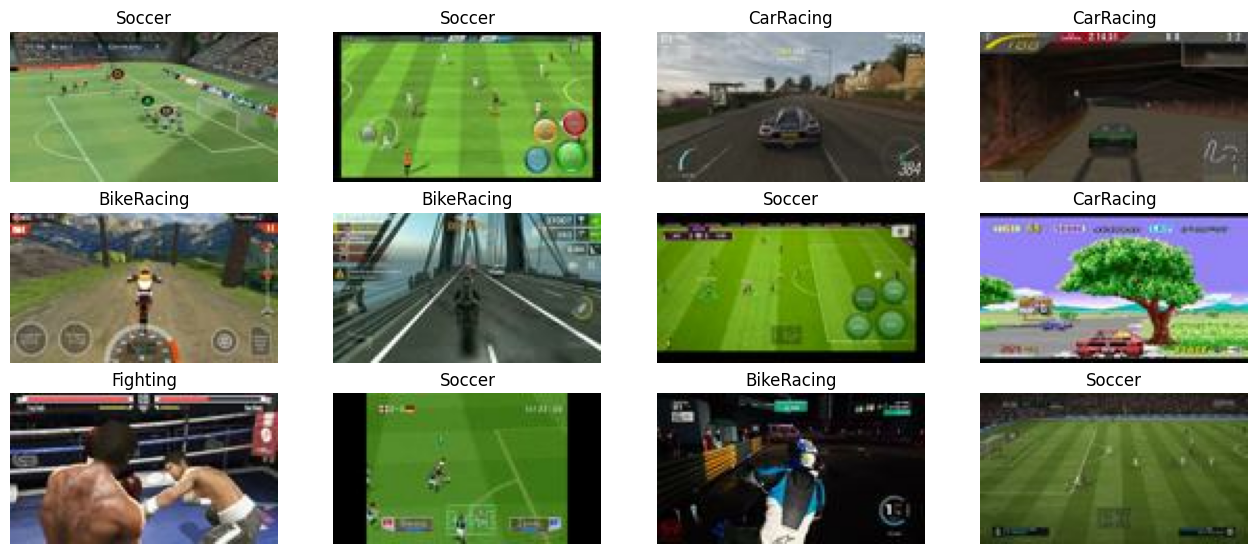

In [33]:
plt.figure(figsize=(16, 9))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4, 4, i + 1)
    img = images[i].numpy().astype(np.uint8)
    plt.imshow(img) #, cmap=plt.cm.gray)
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Pretrain CNN model

In [3]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(72, 128, 3)),
    tf.keras.layers.Conv2D(16, (11, 11), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(16, (9, 9), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 118, 16)         │           5,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 59, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 23, 51, 16)          │          20,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 25, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 21, 16)           │           6,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2352)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          75,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 108,420 (423.52 KB)

 Trainable params: 108,420 (423.52 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.fit(pretrain_ds, epochs=10, batch_size=32)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 366s 322ms/step - accuracy: 0.6627 - loss: 0.7566
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 349s 310ms/step - accuracy: 0.8995 - loss: 0.2718
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 349s 310ms/step - accuracy: 0.9296 - loss: 0.1976
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 350s 310ms/step - accuracy: 0.9441 - loss: 0.1601
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 351s 312ms/step - accuracy: 0.9512 - loss: 0.1426
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 349s 310ms/step - accuracy: 0.9628 - loss: 0.1088
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 346s 308ms/step - accuracy: 0.9680 - loss: 0.0967
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 347s 308ms/step - accuracy: 0.9739 - loss: 0.0830
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 347s 308ms/step - accuracy: 0.9762 - loss: 0.0709
Epoch 10/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 346s 307ms/step - accuracy: 0.9801 - loss: 0.0597


In [5]:
model.save_weights('./weights/pretrained_weights.weights.h5')

In [7]:
val_loss, val_acc = model.evaluate(val_ds)
print('Accuracy on pretrained model:', val_acc)

125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6231 - loss: 502.7729
Accuracy on pretrained model: 0.6215000152587891


# Fine-tuning by optimizers

In [10]:
for i in range(7):
    model.layers[i].trainable = False

optimizers = ['adam', 'sgd', 'lion', 'loss_scale_optimizer']

for i in range(len(optimizers)):
    model.load_weights('./weights/pretrained_weights.weights.h5')
    model.optimizer = optimizers[i]
    model.fit(train_ds, epochs=20, batch_size=32)
    model.save_weights('./weights/' + optimizers[i] + '.weights.h5')
    val_loss, val_acc = model.evaluate(val_ds)
    print('Accuracy on model fine-tuned by optimizer ' + optimizers[i] + ':', val_acc)

Epoch 1/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 348s 309ms/step - accuracy: 0.7949 - loss: 12.7675
Epoch 2/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 348s 309ms/step - accuracy: 0.8427 - loss: 0.4211
Epoch 3/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 347s 308ms/step - accuracy: 0.9063 - loss: 0.2572
Epoch 4/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 347s 308ms/step - accuracy: 0.9407 - loss: 0.1849
Epoch 5/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 348s 309ms/step - accuracy: 0.9549 - loss: 0.1494
Epoch 6/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 349s 310ms/step - accuracy: 0.9618 - loss: 0.1268
Epoch 7/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 348s 309ms/step - accuracy: 0.9663 - loss: 0.1045
Epoch 8/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 348s 309ms/step - accuracy: 0.9746 - loss: 0.0829
Epoch 9/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 346s 308ms/step - accuracy: 0.9624 - loss: 0.1349
Epoch 10/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 346s 307ms/step - accuracy: 0.9772 - loss: 0.0783
Epoch 11/20
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 347s 308ms/step - accuracy: 0.9815 

# Fine-tuning by AIS

In [47]:
model.load_weights('./weights/pretrained_weights.weights.h5')
pretrained_weights = model.get_weights()

def weights_to_list(weights):
    plist = []
    for i in range(32):
        plist.extend(weights[8][i])
    plist.extend(weights[9])
    return plist

def list_to_weights(weights):
    for i in range(32):
        arr = []
        for j in range(4):
            arr.append(weights[i * 4 + j])
        pretrained_weights[8][i] = np.array(arr, dtype="float32")
    pretrained_weights[9] = np.array(weights[-4:], dtype="float32")
    return pretrained_weights

In [74]:
dataset2 = train_ds.map(lambda x: x * x)

TypeError: in user code:


    TypeError: outer_factory.<locals>.inner_factory.<locals>.<lambda>() takes 1 positional argument but 2 were given


In [62]:
random.seed(16)

def accuracy(w):
    model.set_weights(list_to_weights(w))
    test_loss, test_accuracy = model.evaluate(train_ds, verbose=None)
    return test_accuracy

def clonal_selection(fitness_function, first_individual, population_size, n_iterations):
    percentage_of_cloning = 1
    clone_size = 98
    mutation_rate = 0.01

    population = []
    max_fit = []
    avg_fit = []
    
    for i in range(population_size):
        individual = deepcopy(first_individual)
        for j in range(len(first_individual)):
            if random.random() < 30 / len(first_individual):
                individual[j] += 0.02 * random.random() - 0.01
        population.append(individual)

    with tqdm(total=n_iterations) as pbar:
        for i in range(n_iterations):
            population = sorted(population, key=lambda x: - fitness_function(x))
            max_fit.append(accuracy(population[0]))
            
            # if not (i + 1) % 20:
            #     avg_pop_fit = 0
            #     for l in range(len(population)):
            #         avg_pop_fit += mse(population[l])
            #     avg_fit.append(avg_pop_fit)
            
            new_population = []
            for individual in population[:len(population) * percentage_of_cloning // 100]:
                clones = [individual.copy() for j in range(clone_size)]
                for clone in clones:
                    for k in range(len(clone)):
                        if random.random() < mutation_rate:
                            clone[k] = 0.2 * random.random() - 0.1
                new_population.extend(clones)
            new_population.extend(population)
            population = new_population[:population_size]
            pbar.update(1)
    return population[0], max_fit #, avg_fit

In [63]:
best_ind, max_fit = clonal_selection(accuracy, weights_to_list(pretrained_weights), 50, 5)

100%|████████████████████████████████████████████████████████████████████████████████| 5/5 [1:58:21<00:00, 1420.29s/it]


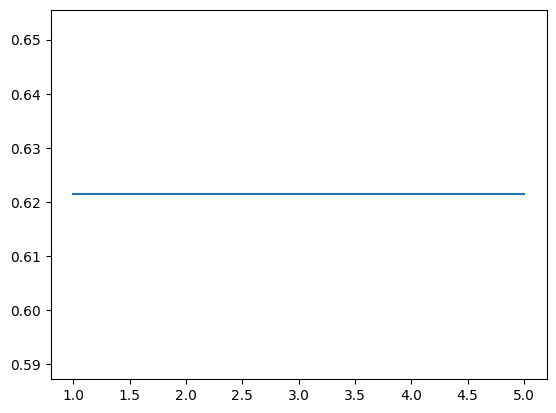

In [64]:
y = list(range(1, len(max_fit) + 1))
plt.plot(y, max_fit)
plt.show()

In [100]:
model.set_weights(list_to_weights(best_ind))

In [103]:
val_loss, val_acc = model.evaluate(val_ds)
print('Accuracy on test dataset:', val_acc)

267/267 ━━━━━━━━━━━━━━━━━━━━ 132s 492ms/step - accuracy: 0.4506 - loss: 7036.8477
Accuracy on test dataset: 0.45505619049072266


In [104]:
model.save_weights('./model_weights/ais.weights.h5')